In [79]:
import numpy as np  # Linear algebra operations
import pandas as pd  # Used for data preparation
import plotly.express as px  # Used for data visualization
from textblob import TextBlob  # Used for sentiment analysis
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import ast
df = pd.read_csv('Neflix IMDB Ratings.csv')

In [80]:
#Group by 'age_certification' and count occurrences of each category
x = df.groupby(['age_certification']).size().reset_index(name='counts')
print(x) 

   age_certification  counts
0                  G     131
1              NC-17      14
2                 PG     246
3              PG-13     440
4                  R     575
5              TV-14     470
6               TV-G      76
7              TV-MA     841
8              TV-PG     186
9               TV-Y     105
10             TV-Y7     112


In [81]:
import plotly.io as pio
pio.renderers.default = "browser"  # Opens chart in the default browser
#Disribution of Age Certification in Netflix
pieChart1=px.pie(x,values='counts',names='age_certification',title='Disribution of Age Certification in Netflix')
pieChart1.show()

In [82]:
x=df.groupby(['type']).size().reset_index(name='counts')
print(x)

    type  counts
0  MOVIE    3759
1   SHOW    2047


In [83]:
df['seasons']=df['seasons'].fillna("seasons not available")
df.head(100)

,index,id,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,first_genre
0,0,ts300399,Five Came Back: The Reference Films,SHOW,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN,documentation
1,1,tm84618,Taxi Driver,MOVIE,1976,R,113,"['crime', 'drama']",['US'],seasons not available,tt0075314,8.3,795222.0,crime
2,2,tm127384,Monty Python and the Holy Grail,MOVIE,1975,PG,91,"['comedy', 'fantasy']",['GB'],seasons not available,tt0071853,8.2,530877.0,comedy
3,3,tm70993,Life of Brian,MOVIE,1979,R,94,['comedy'],['GB'],seasons not available,tt0079470,8.0,392419.0,comedy
4,4,tm190788,The Exorcist,MOVIE,1973,R,133,['horror'],['US'],seasons not available,tt0070047,8.1,391942.0,horror
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,tm52274,The Little Wars,MOVIE,1982,NaN,108,"['drama', 'war', 'european']","['FR', 'LB']",seasons not available,tt0084492,6.3,149.0,drama
96,96,tm132164,Bill Hicks: Sane Man,MOVIE,1989,R,81,['comedy'],['US'],seasons not available,NaN,NaN,NaN,comedy
97,97,tm342996,Duniya,MOVIE,1984,NaN,170,"['drama', 'action']",['IN'],seasons not available,tt0301231,6.2,241.0,drama
98,98,ts63001,High Risk,SHOW,1988,TV-PG,50,['comedy'],['US'],1.0,tt0094478,3.8,6.0,comedy


In [84]:
df['age_certification']=df['age_certification'].fillna("Age not specified")
df['imdb_id']=df['imdb_id'].fillna("Data Not Provided By IMDB")
df['imdb_score']=df['imdb_score'].fillna("Data Not Provided By IMDB")
df['imdb_votes']=df['imdb_votes'].fillna("Data Not Provide By IMDB")
df.head(100)

,index,id,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,first_genre
0,0,ts300399,Five Came Back: The Reference Films,SHOW,1945,TV-MA,48,['documentation'],['US'],1.0,Data Not Provided By IMDB,Data Not Provided By IMDB,Data Not Provide By IMDB,documentation
1,1,tm84618,Taxi Driver,MOVIE,1976,R,113,"['crime', 'drama']",['US'],seasons not available,tt0075314,8.3,795222.0,crime
2,2,tm127384,Monty Python and the Holy Grail,MOVIE,1975,PG,91,"['comedy', 'fantasy']",['GB'],seasons not available,tt0071853,8.2,530877.0,comedy
3,3,tm70993,Life of Brian,MOVIE,1979,R,94,['comedy'],['GB'],seasons not available,tt0079470,8.0,392419.0,comedy
4,4,tm190788,The Exorcist,MOVIE,1973,R,133,['horror'],['US'],seasons not available,tt0070047,8.1,391942.0,horror
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,tm52274,The Little Wars,MOVIE,1982,Age not specified,108,"['drama', 'war', 'european']","['FR', 'LB']",seasons not available,tt0084492,6.3,149.0,drama
96,96,tm132164,Bill Hicks: Sane Man,MOVIE,1989,R,81,['comedy'],['US'],seasons not available,Data Not Provided By IMDB,Data Not Provided By IMDB,Data Not Provide By IMDB,comedy
97,97,tm342996,Duniya,MOVIE,1984,Age not specified,170,"['drama', 'action']",['IN'],seasons not available,tt0301231,6.2,241.0,drama
98,98,ts63001,High Risk,SHOW,1988,TV-PG,50,['comedy'],['US'],1.0,tt0094478,3.8,6.0,comedy


In [85]:
if 'genres' in df.columns:
    df['primary_genre'] = df['genres'].apply(lambda x: ast.literal_eval(x)[0] if (pd.notnull(x) and ast.literal_eval(x)) else '')

    df = df.drop('genres', axis=1)
else:
    print("'genres' column not found in the DataFrame.")

df.head(100)
x=df.groupby(['primary_genre']).size().reset_index(name='counts')
print(x)

    primary_genre  counts
0                      68
1          action     292
2       animation     232
3          comedy    1310
4           crime     254
5   documentation     588
6           drama    1432
7          family      66
8         fantasy     143
9         history       9
10         horror     121
11          music      50
12        reality     176
13        romance     265
14          scifi     289
15          sport       4
16       thriller     442
17            war      43
18        western      22


In [86]:
x=df.groupby(['primary_genre']).size().reset_index(name='counts')
print(x)

    primary_genre  counts
0                      68
1          action     292
2       animation     232
3          comedy    1310
4           crime     254
5   documentation     588
6           drama    1432
7          family      66
8         fantasy     143
9         history       9
10         horror     121
11          music      50
12        reality     176
13        romance     265
14          scifi     289
15          sport       4
16       thriller     442
17            war      43
18        western      22


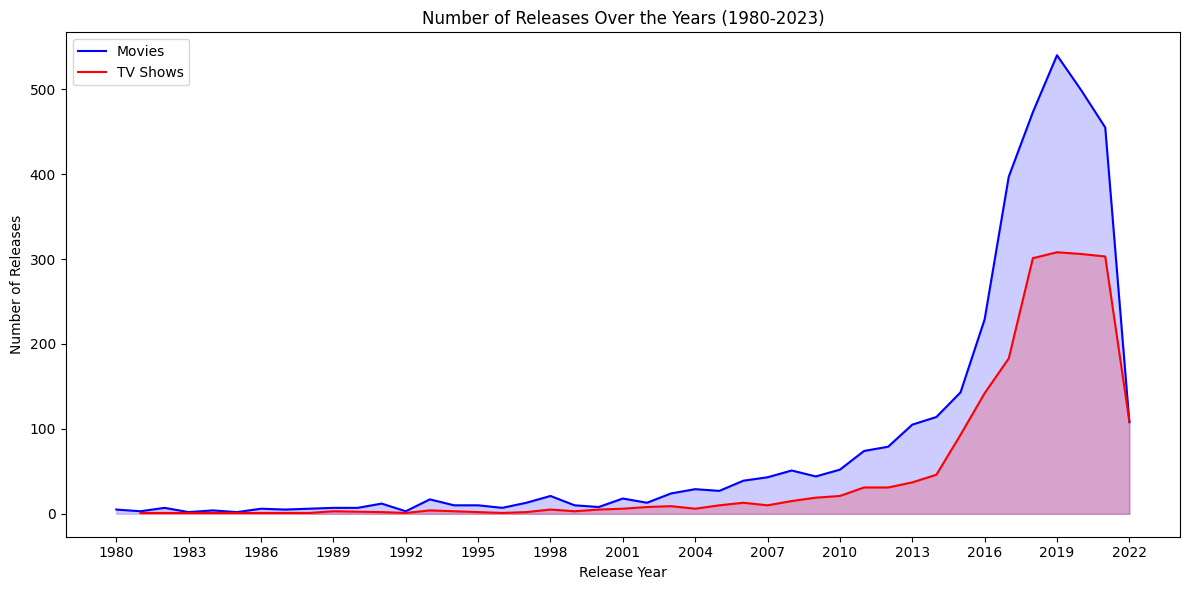

In [87]:
filtered_df = df[(df['release_year'] >= 1980) & (df['release_year'] <= 2023) & (df['release_year'].notnull())]

movies_per_year = filtered_df[filtered_df['type'] == 'MOVIE']['release_year'].value_counts().sort_index()
shows_per_year = filtered_df[filtered_df['type'] == 'SHOW']['release_year'].value_counts().sort_index()

movies_per_year = movies_per_year.fillna(0)
shows_per_year = shows_per_year.fillna(0)

start_year = 1980
year_ticks = range(start_year, 2023, 3)

plt.figure(figsize=(12, 6))
sns.lineplot(x=movies_per_year.index.astype(str), y=movies_per_year.values, label='Movies', color='blue')
sns.lineplot(x=shows_per_year.index.astype(str), y=shows_per_year.values, label='TV Shows', color='#FF0000')

plt.fill_between(x=movies_per_year.index.astype(str), y1=0, y2=movies_per_year.values, color='blue', alpha=0.2)
plt.fill_between(x=shows_per_year.index.astype(str), y1=0, y2=shows_per_year.values, color='#FF0000', alpha=0.2)

plt.xticks([str(year) for year in year_ticks])

plt.title('Number of Releases Over the Years (1980-2023)')
plt.xlabel('Release Year')
plt.ylabel('Number of Releases')
plt.legend()
plt.tight_layout()
plt.show()

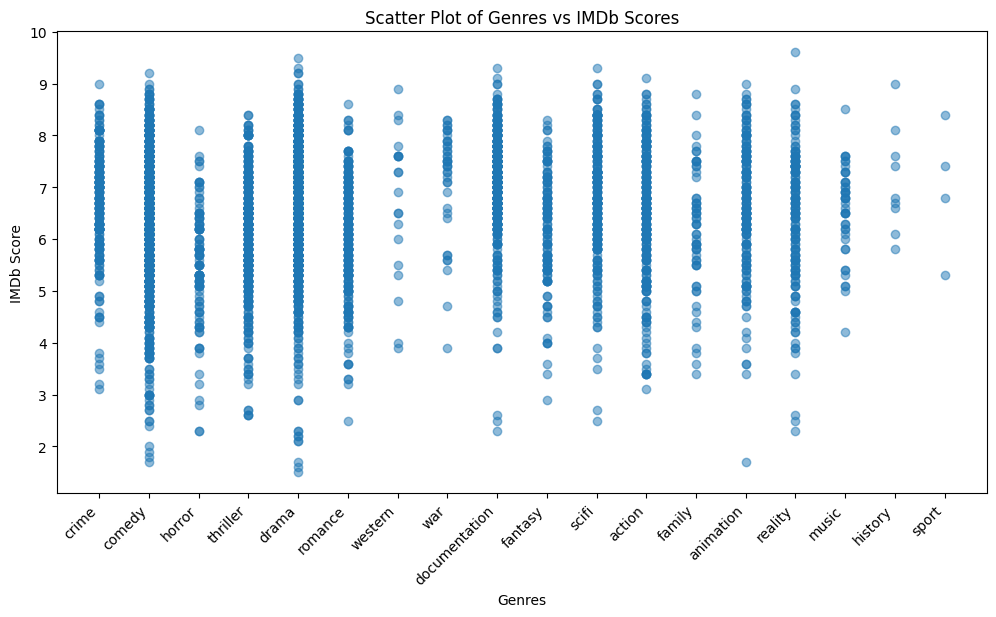

In [88]:
file_path = 'Neflix IMDB Ratings.csv'
df = pd.read_csv(file_path)

df = df.dropna(subset=['genres'])

def extract_first_genre(genre_list):
    try:
        genres = ast.literal_eval(genre_list)
        return genres[0] if genres else None
    except (ValueError, IndexError):
        return None

df['first_genre'] = df['genres'].apply(extract_first_genre)
df.to_csv(file_path, index=False)

df = pd.read_csv('Neflix IMDB Ratings.csv')

df['first_genre'] = df['genres'].apply(lambda x: ast.literal_eval(x)[0] if isinstance(x, str) and len(ast.literal_eval(x)) > 0 else None)

df = df.dropna(subset=['first_genre', 'imdb_score'])

plt.figure(figsize=(12, 6))
plt.scatter(df['first_genre'], df['imdb_score'], alpha=0.5)
plt.title('Scatter Plot of Genres vs IMDb Scores')
plt.xlabel('Genres')
plt.ylabel('IMDb Score')
plt.xticks(rotation=45, ha='right')
plt.show()


C:\Users\dhars\AppData\Local\Temp\ipykernel_8992\1080624895.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




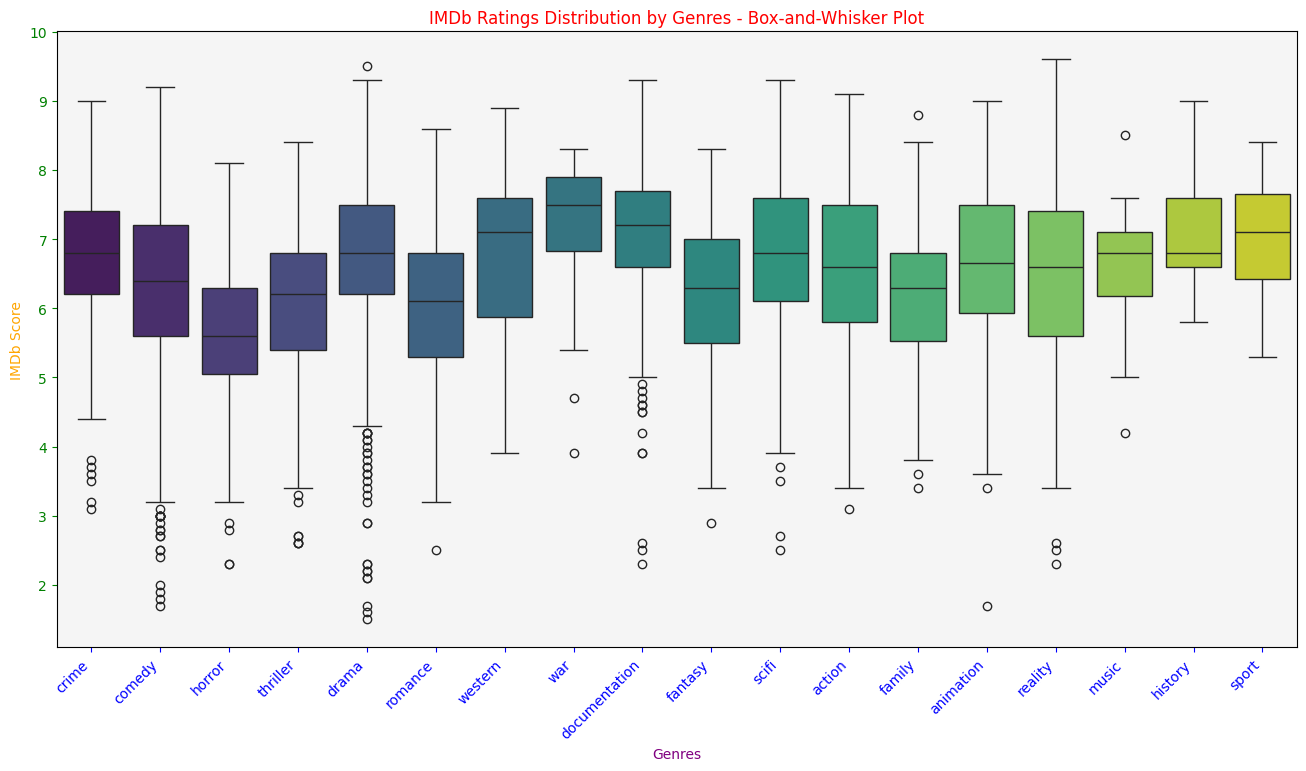

In [89]:
df = df.dropna(subset=['imdb_score', 'first_genre'])

plt.figure(figsize=(16, 8))
plot = sns.boxplot(x='first_genre', y='imdb_score', data=df, palette='viridis')
plot.set_facecolor('#F5F5F5')
plot.tick_params(axis='x', colors='blue')
plot.tick_params(axis='y', colors='green')

plot.set_title('IMDb Ratings Distribution by Genres - Box-and-Whisker Plot', color='red')
plot.set_xlabel('Genres', color='purple')
plot.set_ylabel('IMDb Score', color='orange')

plt.xticks(rotation=45, ha='right')
plt.show()

In [90]:
df=pd.read_csv('netflix_titles.csv')

df.isnull().sum()
x=df.copy()
x=x.dropna()
x.shape

(4808, 12)

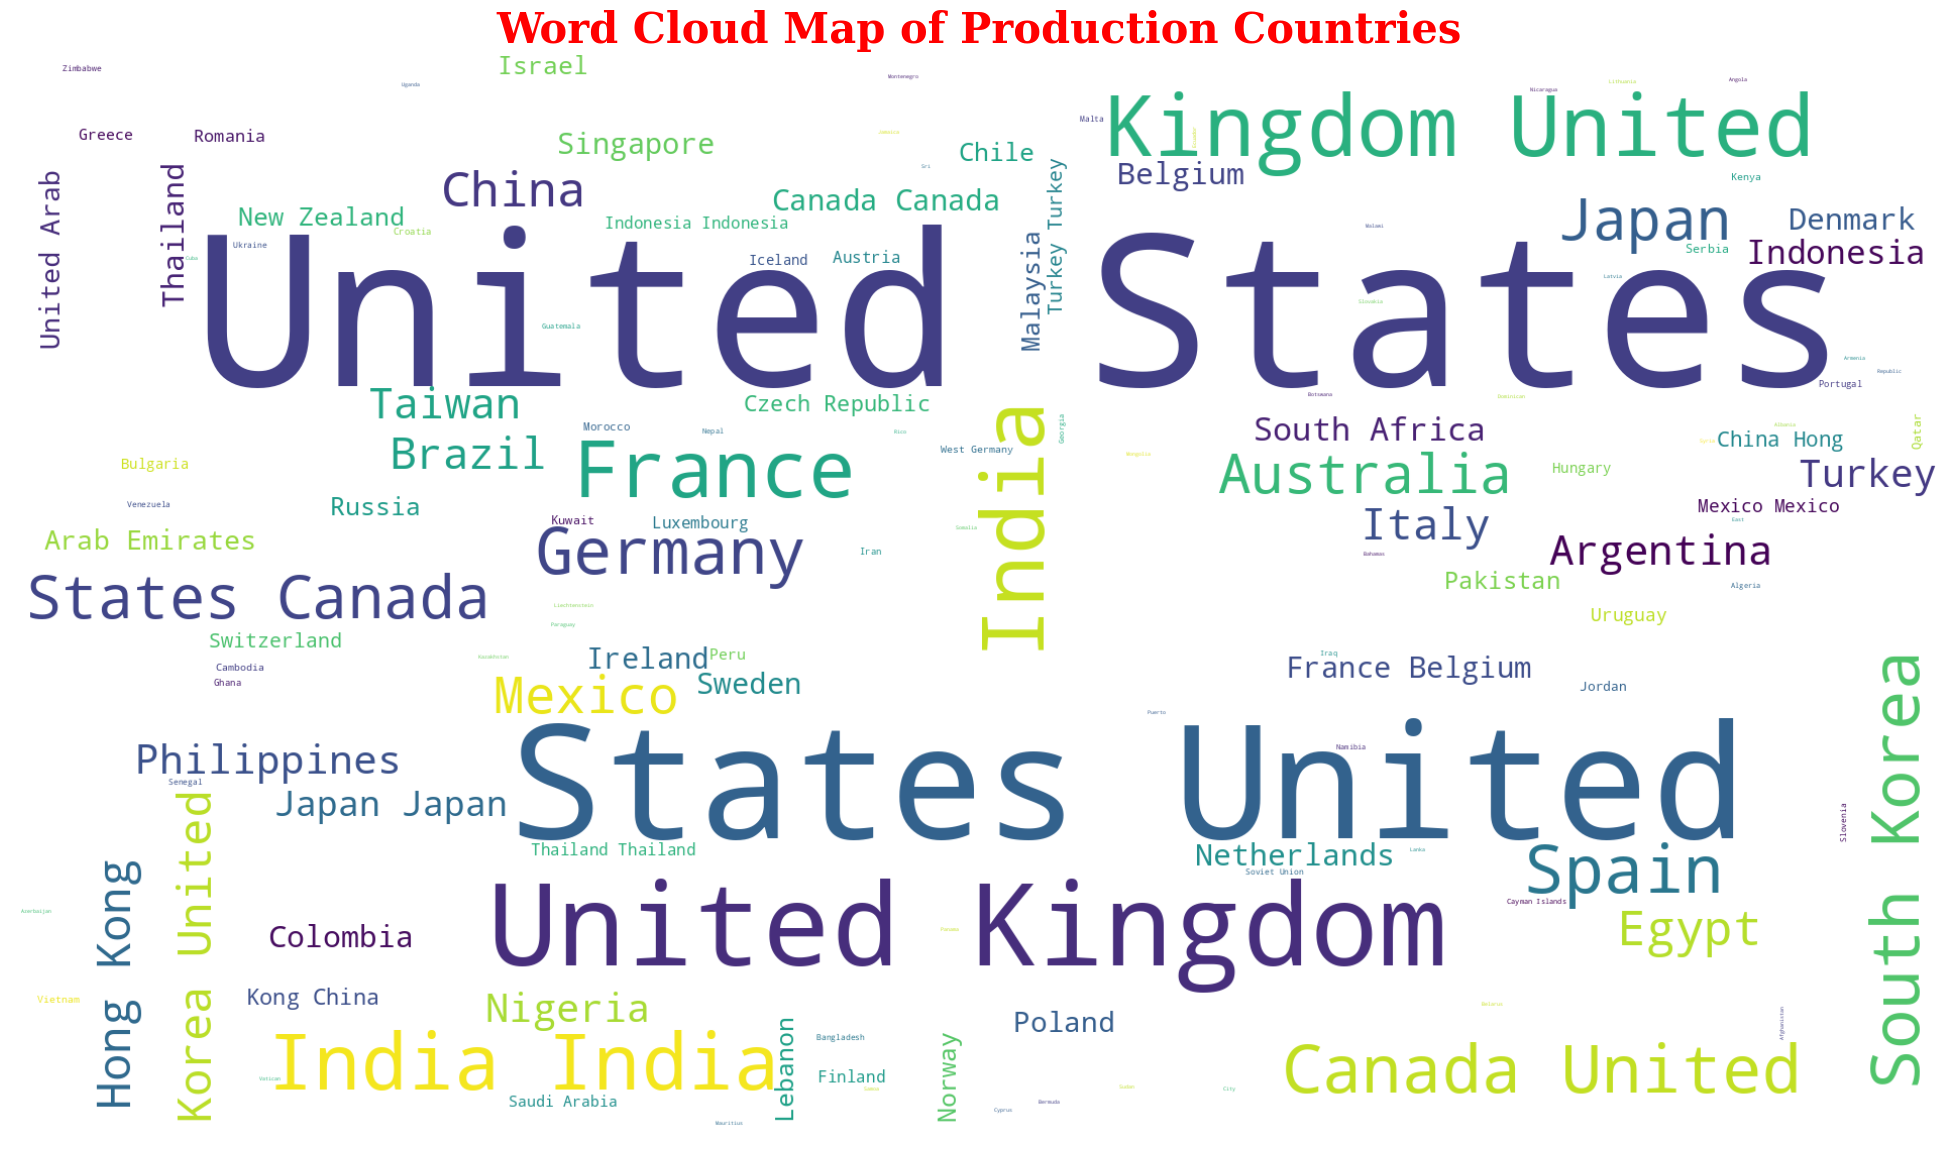

In [91]:
# Set figure size
plt.figure(figsize=(25, 15))

# Generate WordCloud from the 'country' column, dropping NaN values
wordcloud = WordCloud(
    background_color='white',
    width=1920,
    height=1080
).generate(" ".join(df['country'].dropna()))

# Set title with styling
plt.title('Word Cloud Map of Production Countries', 
          fontsize=30, fontweight='bold', fontfamily='serif', color='red')

# Display WordCloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

# Save the figure as an image
plt.savefig('country.png')

# Show the plot
plt.show()


In [92]:
df3 = df[['release_year', 'description']]
df3 = df3.rename(columns={'release_year': 'Release_year', 'description': 'Description'})

for index, row in df3.iterrows():
    d = row['Description']
    testimonial = TextBlob(d)
    p = testimonial.sentiment.polarity
    if p == 0:
        sent = 'Neutral'
    elif p > 0:
        sent = 'Positive'
    else:
        sent = 'Negative'
    df3.loc[index, 'Sentiment'] = sent

df3 = df3.groupby(['Release_year', 'Sentiment']).size().reset_index(name='Total Count')

all_years = list(range(2005, 2020))
df3 = df3[df3['Release_year'].isin(all_years)]

color_map = {'Positive': 'lightgreen', 'Neutral': 'white', 'Negative': 'red'}

bg = px.bar(df3, x="Release_year", y="Total Count", color="Sentiment",
            color_discrete_map=color_map,
            title='Sentiment Analysis Of Data on Netflix')

bg.update_xaxes(tickmode='array', tickvals=all_years, dtick=1)
bg.show()

c:\Users\dhars\AppData\Local\Programs\Python\Python312\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



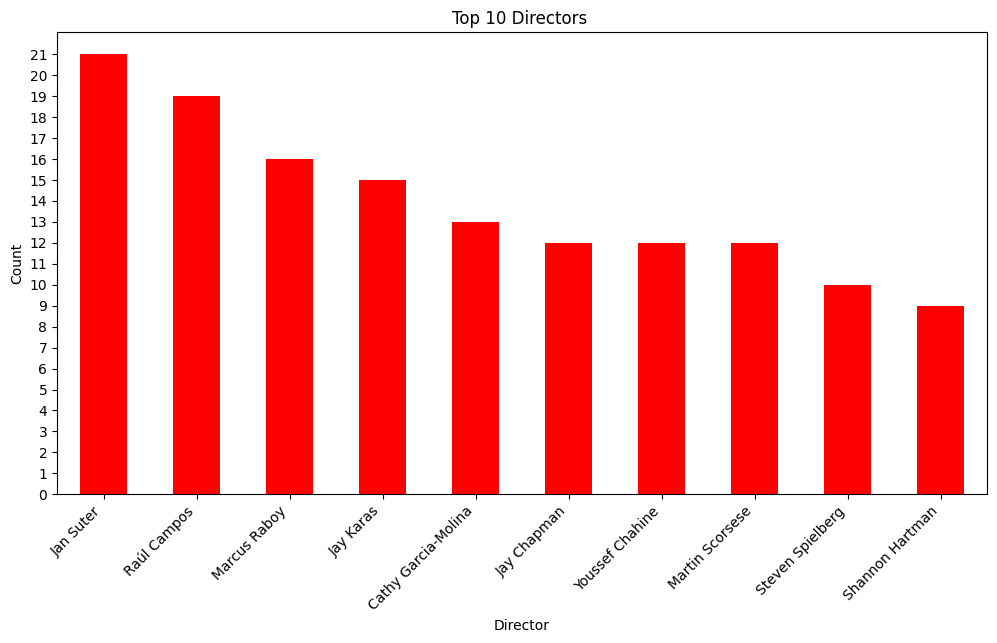

In [93]:
directors_series = df['director']
directors_list = directors_series.dropna().str.split(', ')

flat_directors_list = [director for sublist in directors_list for director in sublist]
director_counts = pd.Series(flat_directors_list).value_counts()

top_directors = director_counts.head(10)

plt.figure(figsize=(12, 6))
top_directors.plot(kind='bar', color='red')
plt.title('Top 10 Directors ')
plt.xlabel('Director')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

plt.yticks(range(int(top_directors.max()) + 1))

plt.show()

In [94]:
df = pd.read_csv('netflix_titles.csv')

df = df.dropna(subset=['country'])
country_counts = df['country'].explode().value_counts()

tree_df = pd.DataFrame({'Country': country_counts.index, 'Count': country_counts.values})

fig = px.treemap(tree_df, path=['Country'], values='Count', title='Country-wise Production TreeMap')
fig.update_layout(margin=dict(l=0, r=0, b=0, t=40))
fig.show()


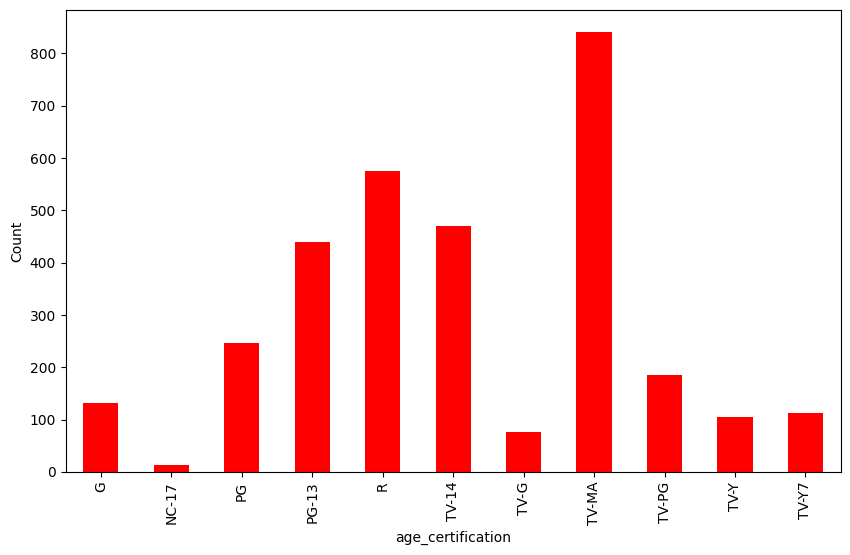

In [95]:
df = pd.read_csv('ns5.csv')

plt.figure(figsize=(10, 6))
df['age_certification'].value_counts().sort_index().plot(kind='bar', color='#FF0000')
plt.xlabel('age_certification')
plt.ylabel('Count')
plt.show()


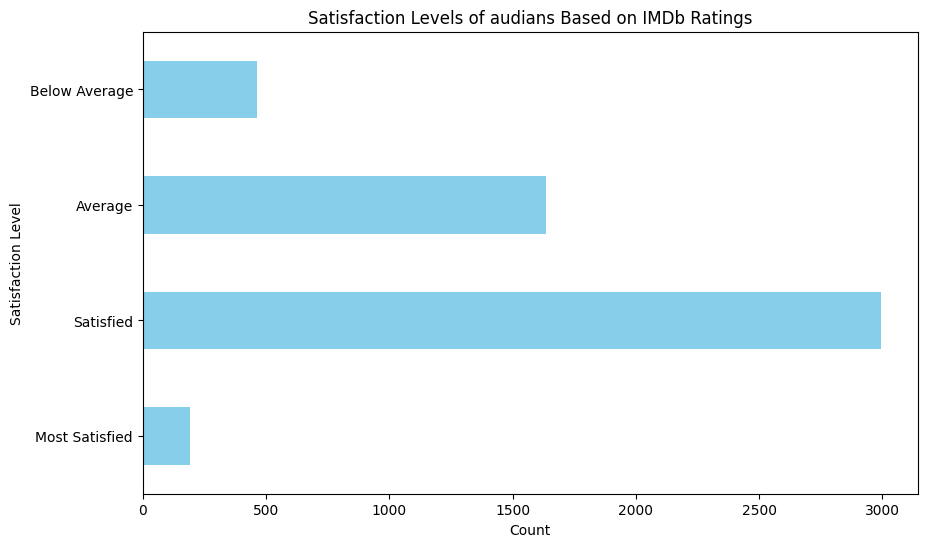

In [96]:


df = df.dropna(subset=['imdb_score'])

bins = [0, 5, 6.4, 8.4, 10]
labels = ['Below Average', 'Average', 'Satisfied', 'Most Satisfied']
df['satisfaction_level'] = pd.cut(df['imdb_score'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(10, 6))
df['satisfaction_level'].value_counts().sort_index(ascending=False).plot(kind='barh', color='skyblue')
plt.title('Satisfaction Levels of audians Based on IMDb Ratings')
plt.xlabel('Count')
plt.ylabel('Satisfaction Level')
plt.show()


C:\Users\dhars\AppData\Local\Temp\ipykernel_8992\3231927296.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




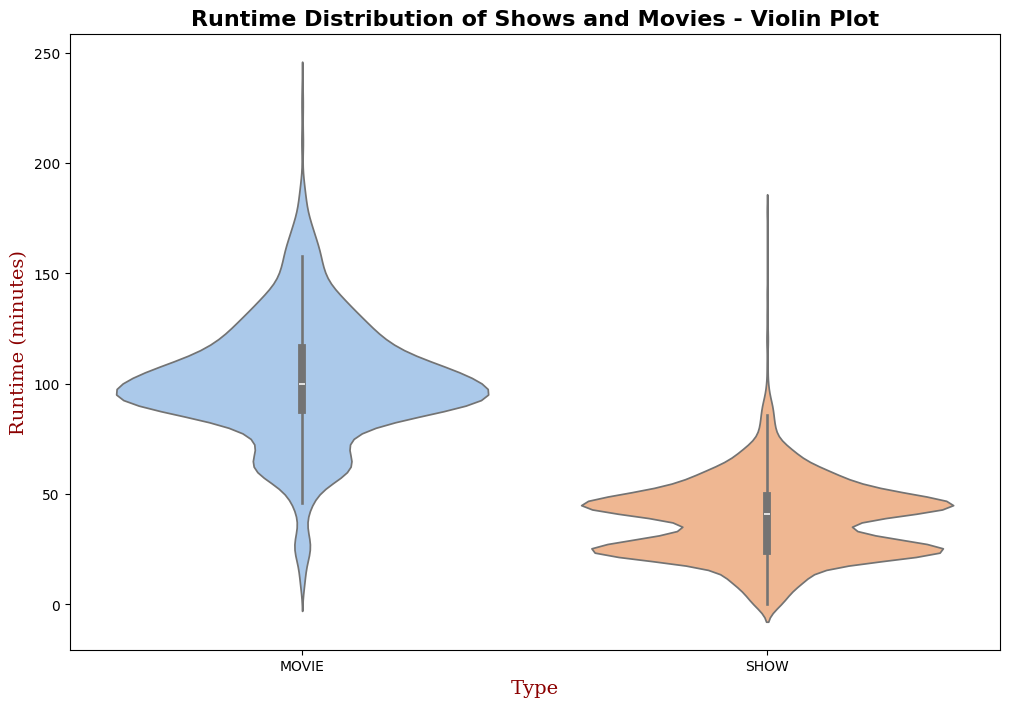

In [97]:
df = df.dropna(subset=['runtime', 'type'])
font_style = {'family': 'serif', 'color':  'darkred', 'weight': 'normal', 'size': 14}

plt.figure(figsize=(12, 8))
sns.violinplot(x='type', y='runtime', data=df, palette='pastel')

plt.title('Runtime Distribution of Shows and Movies - Violin Plot', fontdict={'family': 'sans-serif', 'weight': 'bold', 'size': 16})
plt.xlabel('Type', fontdict=font_style)
plt.ylabel('Runtime (minutes)', fontdict=font_style)
plt.show()
